# Image classification 
## Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Init

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [2]:
# This file contains all the main external libs we'll use
from fastai import *
from fastai.vision import get_image_files

In [3]:
bs = 64

In [4]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [5]:
path = untar_data(URLs.PETS);

In [6]:
datapath4file('dogscats')

PosixPath('/root/.fastai/data/dogscats')

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/models')]

In [8]:
path_anno = path/'annotations'
path_images = path/'images'

In [9]:
fnames = get_image_files(path_images)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_34.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_178.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_94.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_92.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_111.jpg')]

# DataLoader
## pytorch

In [10]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [11]:
from fastai.vision import ImageDataBunch, imagenet_stats, get_transforms

data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                         ).normalize(imagenet_stats)

In [12]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [13]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category keeshond, Category Siamese, Category german_shorthaired, Category Russian_Blue, Category staffordshire_bull_terrier]...
Path: /root/.fastai/data/oxford-iiit-pet
x: ImageItemList (5912 items)
[Image (3, 500, 375), Image (3, 400, 500), Image (3, 500, 333), Image (3, 375, 500), Image (3, 333, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet;

Valid: LabelList
y: CategoryList (1478 items)
[Category Sphynx, Category Sphynx, Category havanese, Category beagle, Category chihuahua]...
Path: /root/.fastai/data/oxford-iiit-pet
x: ImageItemList (1478 items)
[Image (3, 375, 500), Image (3, 375, 500), Image (3, 500, 375), Image (3, 500, 475), Image (3, 332, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet;

Test: None

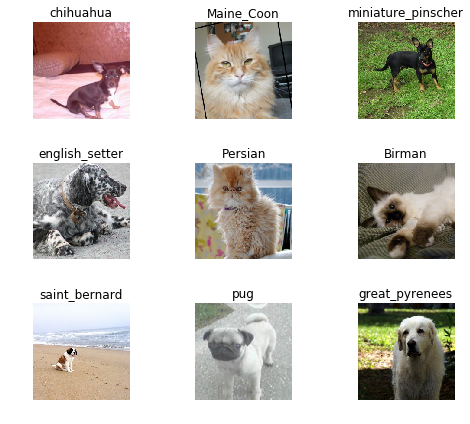

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


# learning
## fit the model 

# resnet34

In [16]:
from fastai.vision import create_cnn, models

In [17]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.388429,0.335441,0.102165
2,0.550888,0.247149,0.080514
3,0.341571,0.220916,0.071042
4,0.257032,0.217347,0.069689


In [19]:
learn.save('stage-1')

## Results

In [26]:
from fastai.vision import ClassificationInterpretation

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

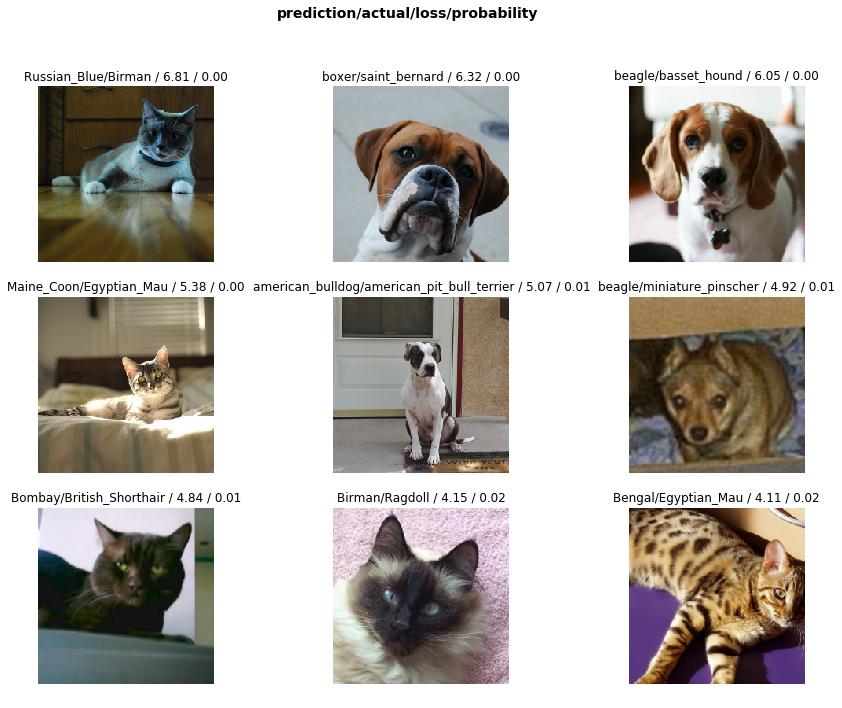

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

In [30]:
doc(interp.plot_top_losses)

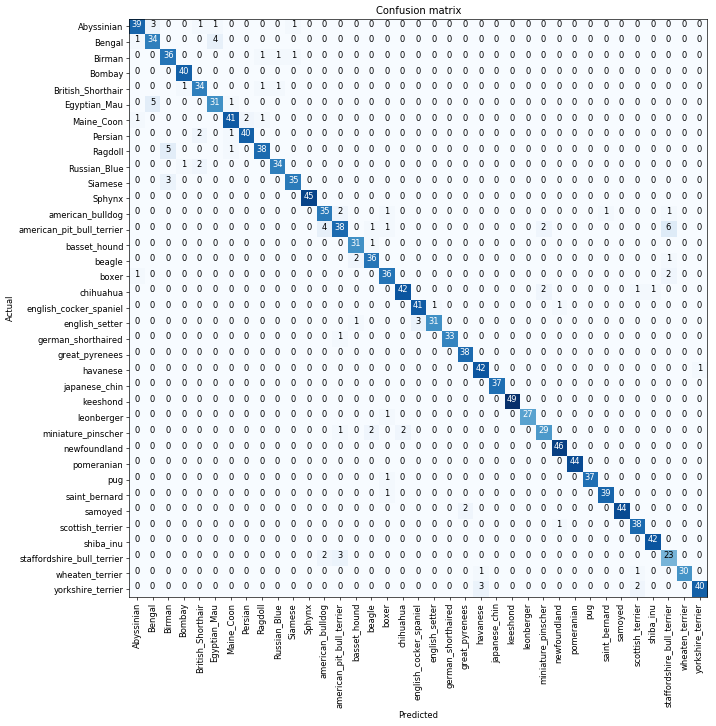

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [33]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Ragdoll', 'Birman', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Siamese', 'Birman', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('yorkshire_terrier', 'havanese', 3)]

# ❄️🔥💧 Unfreeze model

In [34]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.321222,0.678236,0.192828
2,0.546046,0.606599,0.188769
3,0.320999,0.253789,0.077808
4,0.159278,0.212697,0.069012


In [36]:
learn.save('stage-2-transferlearned')

In [ ]:
learn.lr_find()